<a href="https://colab.research.google.com/github/crystal-zhu/Sitcom_Success_Factors-CSDS_312/blob/main/SSF_Friends_Summaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up


In [ ]:
# import
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [ ]:
with open("/content/drive/Shareddrives/CSDS 312 Final Project/friends_info.csv") as d:
  data = pd.read_csv(d)

data.head(1)

,Year_of_prod,season,episode_num,title,Duration,Summary,Director,imdb_rating,total_votes,us_viewers
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,21.5


In [ ]:
ep_col = ['season', 'episode_num', 'title', 'Director', 'Year_of_prod', 'us_viewers']
ep_data = data[ep_col].copy()
ep_data.rename(columns={'episode_num': 'episode_num_in_season'}, inplace=True)
imdb_col = ['season', 'episode_num', 'title', 'Director', 'Year_of_prod', 'imdb_rating', 'total_votes', 'Summary']
imdb_data = data[imdb_col].copy()
imdb_data.rename(columns={'episode_num': 'episode_num_in_season'}, inplace=True)
imdb_data.head()

,season,episode_num_in_season,title,Director,Year_of_prod,imdb_rating,total_votes,Summary
0,1,1,The One Where Monica Gets a Roommate: The Pilot,James Burrows,1994,8.3,7440,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,James Burrows,1994,8.1,4888,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,James Burrows,1994,8.2,4605,Monica becomes irritated when everyone likes h...
3,1,4,The One with George Stephanopoulos,James Burrows,1994,8.1,4468,Joey and Chandler take Ross to a hockey game t...
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,1994,8.5,4438,"Eager to spend time with Rachel, Ross pretends..."


# US Views per Episode of B99

In [ ]:
ep_data['us_viewers'] = pd.to_numeric(ep_data['us_viewers'], errors = 'coerce')
ep_data['us_viewers'] = ep_data['us_viewers']


Text(50.722222222222214, 0.5, 'Season')

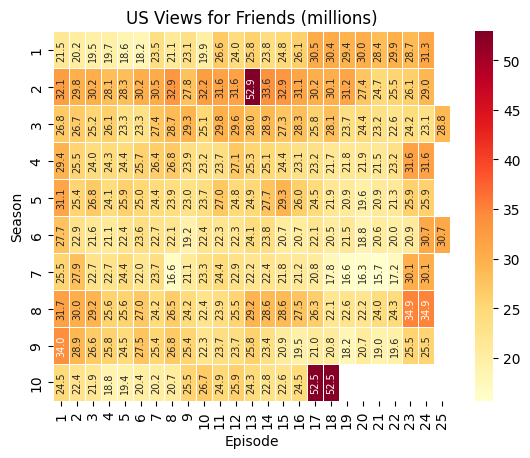

In [ ]:
custom = LinearSegmentedColormap.from_list('YR', [(1, 1, 0), (1, 0, 0)])

views_heatmap = ep_data.pivot_table(index='season', columns='episode_num_in_season', values='us_viewers', aggfunc='mean')
views = sns.heatmap(views_heatmap, fmt=".1f", cmap="YlOrRd", linewidths=0.5, annot = True, annot_kws={"size": 7, "rotation": 90})
views.set_title("US Views for Friends (millions)")
views.set_xlabel("Episode")
views.set_ylabel("Season")

### Most Viewed Episodes

In [ ]:
top_10_viewed = ep_data.nlargest(10, 'us_viewers')
top_10_viewed[['season', 'episode_num_in_season', 'title', 'us_viewers']]

,season,episode_num_in_season,title,us_viewers
36,2,13,The One After the Superbowl: Part 2,52.90
234,10,17,The Last One: Part 1,52.46
235,10,18,The Last One: Part 2,52.46
192,8,23,The One Where Rachel Has a Baby: Part 1,34.91
193,8,24,The One Where Rachel Has a Baby: Part 2,34.91
194,9,1,The One Where No One Proposes,34.01
37,2,14,The One with the Prom Video,33.60
31,2,8,The One with the List,32.90
38,2,15,The One Where Ross and Rachel... You Know,32.90
33,2,10,The One with Russ,32.20


### Least Viewed Episodes


In [ ]:
top_10_least_viewed = ep_data.nsmallest(10, 'us_viewers')
top_10_least_viewed[['season', 'episode_num_in_season', 'title', 'us_viewers']]

,season,episode_num_in_season,title,us_viewers
166,7,21,The One with the Vows,15.65
165,7,20,The One with Rachel's Big Kiss,16.30
164,7,19,The One with Ross and Monica's Cousin,16.55
153,7,8,The One Where Chandler Doesn't Like Dogs,16.57
167,7,22,The One with Chandler's Dad,17.23
163,7,18,The One with Joey's Award,17.81
5,1,6,The One with the Butt,18.20
212,9,19,The One with Rachel's Dream,18.25
4,1,5,The One with the East German Laundry Detergent,18.60
221,10,4,The One with the Cake,18.77


# IMDB Ratings for B99

Text(50.722222222222214, 0.5, 'Season')

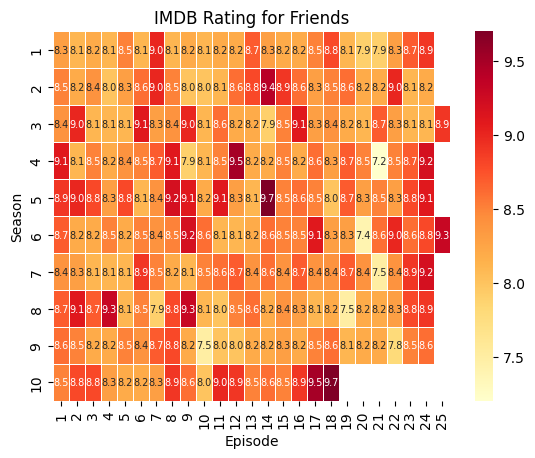

In [ ]:
imdb_data['imdb_rating'] = pd.to_numeric(imdb_data['imdb_rating'], errors = 'coerce')

imdb_heatmap = imdb_data.pivot_table(index='season', columns='episode_num_in_season', values='imdb_rating', aggfunc='mean')
imdb = sns.heatmap(imdb_heatmap, fmt=".1f", cmap="YlOrRd", linewidths=0.5, annot = True, annot_kws={"size": 7})

imdb.set_title("IMDB Rating for Friends")
imdb.set_xlabel("Episode")
imdb.set_ylabel("Season")

### Highest Rated


In [ ]:
top_10_rated = imdb_data.nlargest(10, 'imdb_rating')
top_10_rated[['season', 'episode_num_in_season', 'title', 'imdb_rating']]

,season,episode_num_in_season,title,imdb_rating
110,5,14,The One Where Everybody Finds Out,9.7
235,10,18,The Last One: Part 2,9.7
84,4,12,The One with the Embryos,9.5
234,10,17,The Last One: Part 1,9.5
37,2,14,The One with the Prom Video,9.4
145,6,25,The One with the Proposal,9.3
173,8,4,The One with the Videotape,9.3
178,8,9,The One with the Rumor,9.3
96,4,24,The One with Ross's Wedding,9.2
104,5,8,The One with All the Thanksgivings,9.2


### Lowest Rated

In [ ]:
top_10_lowest_rated = imdb_data.nsmallest(10, 'imdb_rating')
top_10_lowest_rated[['season', 'episode_num_in_season', 'title', 'imdb_rating']]

,season,episode_num_in_season,title,imdb_rating
93,4,21,The One with the Invitation,7.2
140,6,20,The One with Mac and C.H.E.E.S.E.,7.4
166,7,21,The One with the Vows,7.5
188,8,19,The One with Joey's Interview,7.5
203,9,10,The One with Christmas in Tulsa,7.5
215,9,22,The One with the Donor,7.8
19,1,20,The One with the Evil Orthodontist,7.9
20,1,21,The One with the Fake Monica,7.9
61,3,14,The One with Phoebe's Ex-Partner,7.9
81,4,9,The One Where They're Going to Party!,7.9


### Rating to Number of Ratings Ratio

(shows possible bias in ratings. The higher the rating, the more weighted each rating is and the higher likelyhood of an unfair rating)

Text(50.722222222222214, 0.5, 'Season')

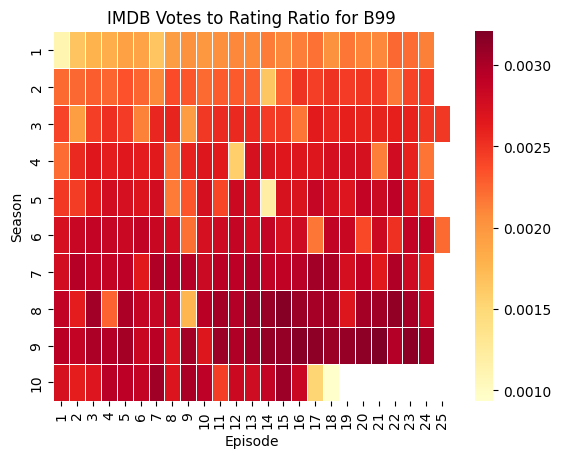

In [ ]:
imdb_data['total_votes'] = pd.to_numeric(imdb_data['total_votes'], errors = 'coerce')

imdb_data['rating_votes_ratio'] = imdb_data['imdb_rating'] / imdb_data['total_votes']
imdb_heatmap2 = imdb_data.pivot_table(index='season', columns='episode_num_in_season', values=('rating_votes_ratio'))
imdb2 = sns.heatmap(imdb_heatmap2,fmt=".1f", cmap="YlOrRd", linewidths=0.5)

imdb2.set_title("IMDB Votes to Rating Ratio for B99")
imdb2.set_xlabel("Episode")
imdb2.set_ylabel("Season")

### Highest Ratio

In [ ]:
top_10_ratio = imdb_data.nlargest(10, 'rating_votes_ratio')
print(top_10_ratio[['season', 'episode_num_in_season', 'title', 'rating_votes_ratio']])

     season  episode_num_in_season                              title  \
214       9                     21    The One with the Fertility Test   
184       8                     15    The One with the Birthing Video   
209       9                     16          The One with the Boob Job   
216       9                     23                The One in Barbados   
213       9                     20  The One with the Soap Opera Party   
210       9                     17  The One with the Memorial Service   
191       8                     22       The One Where Rachel Is Late   
208       9                     15           The One with the Mugging   
207       9                     14       The One with the Blind Dates   
212       9                     19        The One with Rachel's Dream   

     rating_votes_ratio  
214            0.003207  
184            0.003178  
209            0.003168  
216            0.003142  
213            0.003136  
210            0.003133  
191           

### Lowest Ratio


In [ ]:
top_10_lowest_ratio = imdb_data.nsmallest(10, 'rating_votes_ratio')
print(top_10_lowest_ratio[['season', 'episode_num_in_season', 'title', 'rating_votes_ratio']])

     season  episode_num_in_season  \
235      10                     18   
0         1                      1   
110       5                     14   
234      10                     17   
84        4                     12   
37        2                     14   
6         1                      7   
1         1                      2   
178       8                      9   
2         1                      3   

                                               title  rating_votes_ratio  
235                             The Last One: Part 2            0.000934  
0    The One Where Monica Gets a Roommate: The Pilot            0.001116  
110                The One Where Everybody Finds Out            0.001203  
234                             The Last One: Part 1            0.001527  
84                          The One with the Embryos            0.001582  
37                       The One with the Prom Video            0.001639  
6                          The One with the Blackout    

## Ratings vs Views

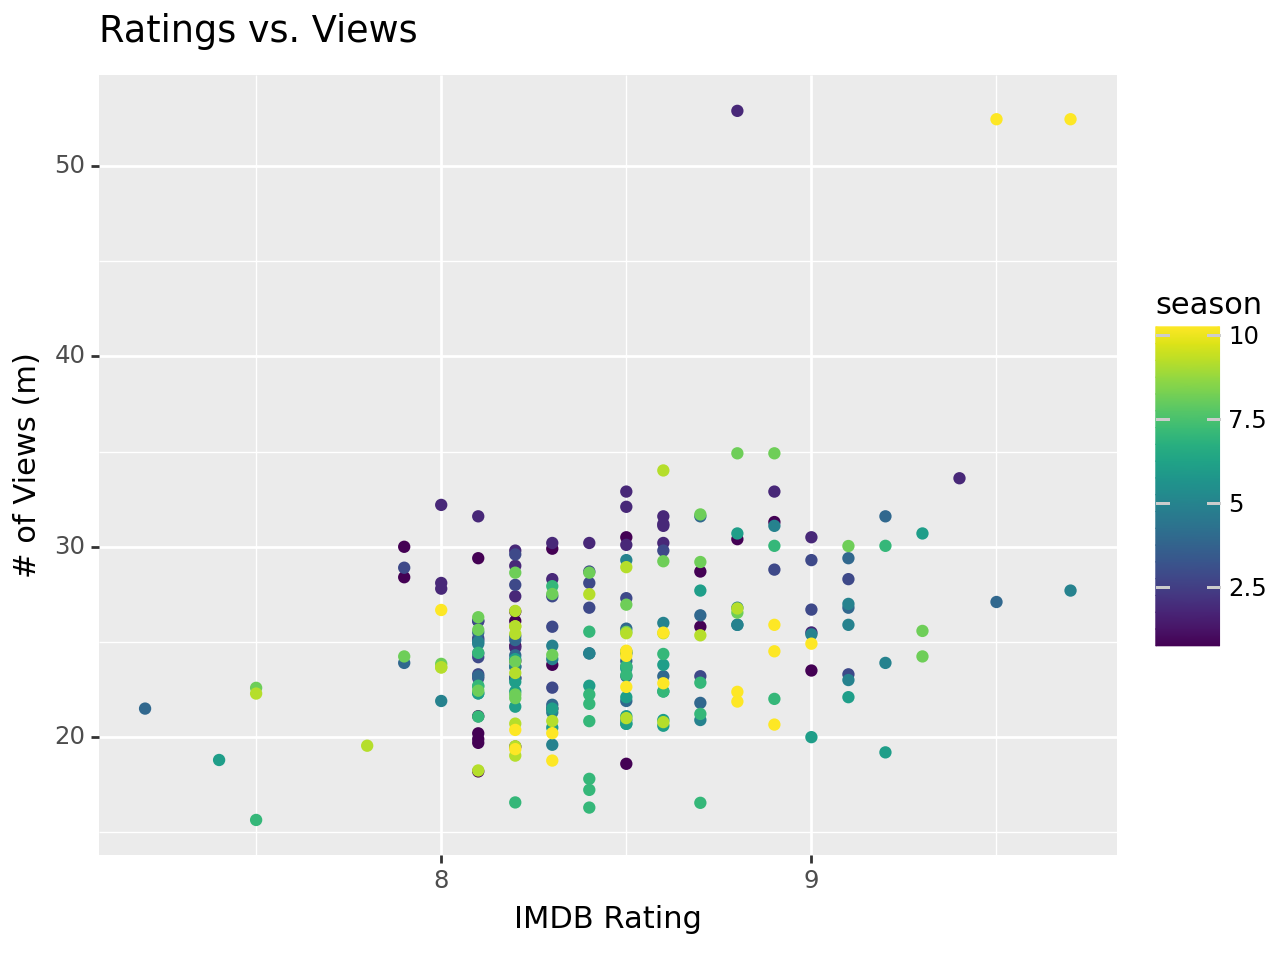

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_point, labs, theme, element_text
info = pd.DataFrame(imdb_data['season'])
info["imdb_rating"] = imdb_data['imdb_rating']
info["us_views"] = ep_data['us_viewers']
ggplot(info, aes(x="imdb_rating", y="us_views", group="season", color="season")) + \
    geom_point() + labs(title="Ratings vs. Views", x="IMDB Rating", y="# of Views (m)")


# Viewer Reviews

# Set Up

In [ ]:
!pip install bs4
!pip install requests-html
from bs4 import BeautifulSoup
import requests
from requests import TooManyRedirects
import time
from time import sleep
import re
import requests_html
from requests_html import HTMLSession
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import numpy as np
!pip install -q transformers
from transformers import pipeline
from plotnine import ggplot, aes, geom_line, theme_minimal,scale_color_manual

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Processing Rotten Tomatoes


In [ ]:
def get_rt_df(url):
  page = requests.get(url)
  session = HTMLSession()
   # Check if the request was successful
  if page.status_code == 200:
      # Parse the HTML content
      soup = BeautifulSoup(page.content, 'html.parser')


      # # Extract user reviews
      reviews = []
      rating = []
      date = []
      if url.find("?type=user")!= -1:
        review_type = "user"
        reviews_text = soup.find_all(class_='audience-reviews__review js-review-text')
        for r in reviews_text:
          reviews.append(r.text.strip())
        # print(reviews)

        reviews_stars = soup.find_all(class_ = "audience-reviews__score")
        for s in reviews_stars:
          count = 0
          whole = s.find_all(class_ = 'star-display__filled')
          count += len(whole)
          half = s.find_all(class_ = 'star-display__half')
          count += len(half)*.5
          rating.append(count)
        dates = soup.find_all(class_ = "audience-reviews__duration")
        for t in dates:
          date.append(t.text)

      else:
        if url.find("?type=top_")!= -1:
          review_type = "top_critic"
        else:
          review_type = "critic"

        reviews_text = soup.find_all(class_='review-text-container')
        for r in reviews_text:
          reviews.append(r.text.strip())
        review_tomatoes = soup.find_all(class_='review-data')
        for t in review_tomatoes:
          tomato = t.find('score-icon-critic-deprecated')
          if tomato['state'] == 'fresh':
            rating.append(5)
          elif tomato['state'] == 'rotten':
            rating.append(0)
          else:
            rating.append(3)
        dates = soup.find_all(class_="review-text-container")
        for t in dates:
          date.append(t.find('span', {'data-qa': 'review-date'}).text)

      data = {'date': date, 'rating': rating, 'review': reviews}
      # print(len(date))
      # print(len(reviews))
      df = pd.DataFrame(data)
      df['review'] = df['review'].str.replace(r'^\n+', '', regex=True)
      season_match = re.search(r'/s(\d+)/', url)
      df['season'] = season_match.group(1)

      df['type'] = review_type
      return df
  else:
      print("Failed to retrieve user reviews. Status code:", page.status_code)
      return None


# Rotten Tomatoes Analysis

In [ ]:
num_seasons = 10
show = "Friends"
show_code = "friends"

In [ ]:
top_critic_reviews = pd.DataFrame()
user_reviews = pd.DataFrame()
all_critic_reviews = pd.DataFrame()

count = list(range(1,num_seasons + 1))
## ADD SEASON 10 MANUALLY
for i in list(range(1,num_seasons)):
  try:
    temp = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews?type=top_critics")
  except AttributeError as e:
    temp = pd.DataFrame()
  top_critic_reviews = pd.concat([top_critic_reviews,temp],ignore_index=True)
  temp2 = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews?type=user")
  user_reviews = pd.concat([user_reviews,temp2],ignore_index=True)
  temp3 = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews")
  all_critic_reviews = pd.concat([all_critic_reviews,temp3],ignore_index=True)

top_critic_reviews = pd.concat([top_critic_reviews,get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s10/reviews?type=top_critics")],ignore_index=True)
user_reviews = pd.concat([user_reviews,get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s10/reviews?type=user")],ignore_index=True)
all_critic_reviews = pd.concat([all_critic_reviews,get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s10/reviews")],ignore_index=True)

In [ ]:
all_reviews = pd.concat([user_reviews, top_critic_reviews, all_critic_reviews])
all_reviews = all_reviews.sort_values(by='season')

season1 = all_reviews[all_reviews['season'] == '01'].sort_values(by='date')
season2 = all_reviews[all_reviews['season'] == '02'].sort_values(by='date')
season3 = all_reviews[all_reviews['season'] == '03'].sort_values(by='date')
season4 = all_reviews[all_reviews['season'] == '04'].sort_values(by='date')
season5 = all_reviews[all_reviews['season'] == '05'].sort_values(by='date')
season6 = all_reviews[all_reviews['season'] == '06'].sort_values(by='date')
season7 = all_reviews[all_reviews['season'] == '07'].sort_values(by='date')
season8 = all_reviews[all_reviews['season'] == '08'].sort_values(by='date')
season9 = all_reviews[all_reviews['season'] == '09'].sort_values(by='date')
season10 = all_reviews[all_reviews['season'] == '10'].sort_values(by='date')

all_reviews

,date,rating,review,season,type
0,"Apr 25, 2024",5.0,Friends is a good show and if you hate or disl...,01,user
15,"Dec 4, 2017",5.0,What draws me back to Friends again and again ...,01,top_critic
14,"Apr 17, 2018",0.0,"NBC's new sitcom ""Friends"" comes across like a...",01,top_critic
13,"Feb 24, 2021",5.0,This show has some problems. But if David and ...,01,top_critic
12,"Feb 24, 2021",0.0,The characters spend a lot of time watching ol...,01,top_critic
...,...,...,...,...,...
180,"Feb 6, 2023",5.0,Fantastic season. Love Paul Rudd.\nHate that i...,10,user
179,"Jun 4, 2023",4.0,The perfect comedy show.,10,user
178,"Jun 10, 2023",5.0,"LOL, the funniest final 17 episodes ever!!!!!!...",10,user
190,"Jul 28, 2021",5.0,Nostalgia at its finest,10,user


In [ ]:
tc_avg = top_critic_reviews['rating'].mean()*2
ur_avg = user_reviews['rating'].mean()*2
ac_avg = all_critic_reviews['rating'].mean()*2

s1_avg = season1['rating'].mean()*2
s2_avg = season2['rating'].mean()*2
s3_avg = season3['rating'].mean()*2
s4_avg = season4['rating'].mean()*2
s5_avg = season5['rating'].mean()*2
s6_avg = season6['rating'].mean()*2
s7_avg = season7['rating'].mean()*2
s8_avg = season8['rating'].mean()*2
s9_avg = season9['rating'].mean()*2
s10_avg = season10['rating'].mean()*2


averages_rt = [s1_avg,s2_avg,s3_avg,s4_avg,s5_avg,s6_avg,s7_avg,s8_avg,s9_avg,s10_avg]
averages_rt

[7.183333333333334,
 8.416666666666666,
 8.666666666666666,
 8.333333333333334,
 9.03448275862069,
 9.26923076923077,
 8.84,
 9.214285714285714,
 6.615384615384615,
 8.346938775510203]

## Rotten Tomatoes vs IMDB Ratings

In [ ]:
# .str.contains(str(i))

7.777777777777778

[6.896551724137931, nan, nan, 10.0, 10.0, 10.0, 10.0, 10.0, 0.0, 7.777777777777778]
[8.75, 8.1, 8.4, 8.5, 8.6, 8.944444444444445, 8.55, 8.842105263157896, 8.1, 8.95]
[7.25, 10.0, 10.0, 6.666666666666667, 10.0, 10.0, 10.0, 10.0, 2.0, 8.0]


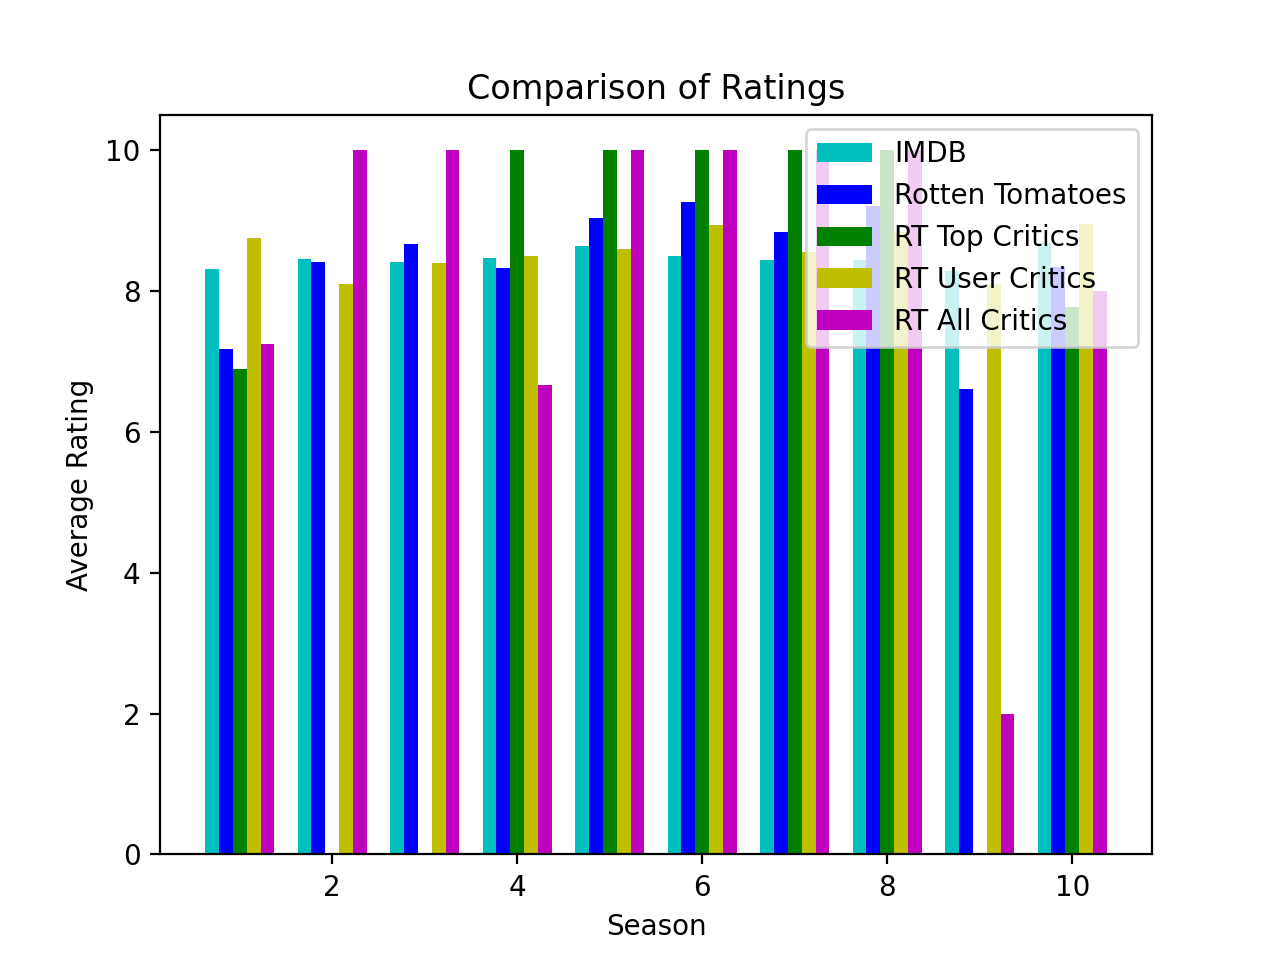

In [ ]:
# Calculate mean ratings for each source and season
imdb_season_ratings = [imdb_data[imdb_data['season'] == i]['imdb_rating'].mean() for i in count]
tc_season = [top_critic_reviews[top_critic_reviews['season'].str.contains(str(i))]['rating'].mean() * 2 for i in count]
user_season = [user_reviews[user_reviews['season'].str.contains(str(i))]['rating'].mean() * 2 for i in count]
ac_season = [all_critic_reviews[all_critic_reviews['season'] .str.contains(str(i))]['rating'].mean() * 2 for i in count]

print(tc_season)
print(user_season)
print(ac_season)

# Define the width of each bar group
bar_width = 0.15

# Calculate the x-coordinates for each group of bars
x_imdb = [i - 0.3 for i in count]
x_rt = [i - 0.15 for i in count]
x_tc = [i for i in count]
x_user = [i + 0.15 for i in count]
x_ac = [i + 0.3 for i in count]

# Create the figure and axes
fig, rt_vs_imdb = plt.subplots()

# Plot the bars for each source and season
rt_vs_imdb.bar(x_imdb, imdb_season_ratings, width=bar_width, color='c', align='center', label='IMDB')
rt_vs_imdb.bar(x_rt, averages_rt, width=bar_width, color='b', align='center', label='Rotten Tomatoes')
rt_vs_imdb.bar(x_tc, tc_season, width=bar_width, color='g', align='center', label='Top Critic')
rt_vs_imdb.bar(x_user, user_season, width=bar_width, color='y', align='center', label='User')
rt_vs_imdb.bar(x_ac, ac_season, width=bar_width, color='m', align='center', label='All Critic')

# Set labels and legend
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title("Comparison of Ratings")
plt.legend(['IMDB', 'Rotten Tomatoes', 'RT Top Critics', 'RT User Critics', 'RT All Critics'])
plt.show()

## Viewer Score Density Plot

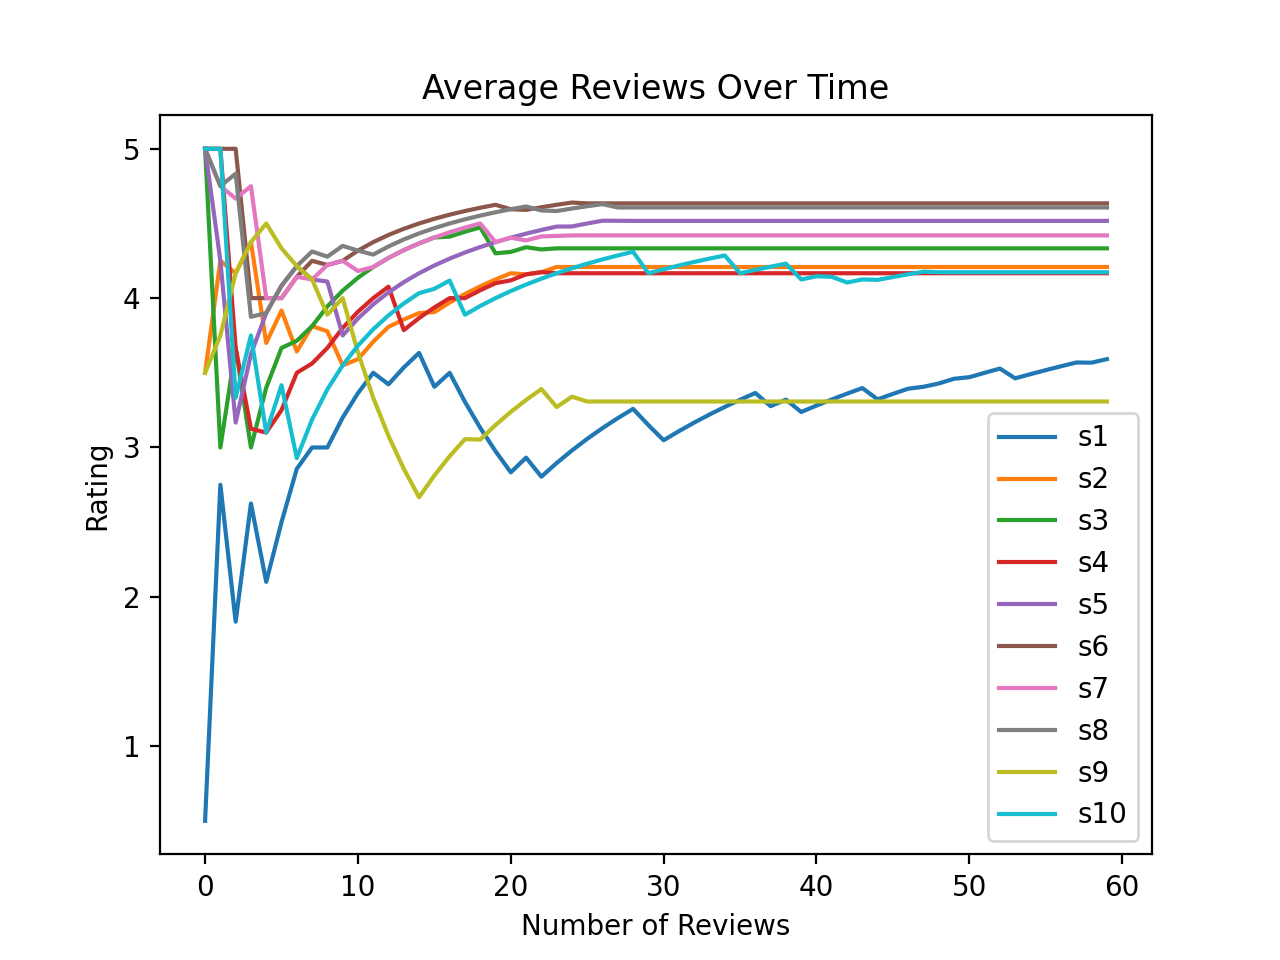

In [ ]:

## CHANGE NEEDED FOR DIFF SEASONS -- season_ratings
season_ratings = {
    'ratings': [season1['rating'], season2['rating'], season3['rating'], season4['rating'], season5['rating'], season6['rating'], season7['rating'], season8['rating'],season9['rating'],season10['rating']],
    'season': ["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8","s9","s10"]
}
# season_ratings = pd.DataFrame(data).reset_index()

x_values = list(range(1,len(season_ratings['ratings'][0])+1))

# Create an empty ggplot object
p = ggplot() + theme_minimal()

count2 = list(range(num_seasons))
for i in count2:
  mean = season_ratings['ratings'][i].mean()
  padded_ratings = np.pad(season_ratings['ratings'][i], (0, 60 - len(season_ratings['ratings'][i])), mode='constant', constant_values=np.nan)
  season_ratings['ratings'][i] = np.where(np.isnan(padded_ratings), mean, padded_ratings)

data = pd.DataFrame()
count3 = list(range(60))
for i in count2:
  temp = []
  avg_temp = []
  for j in count3:
    temp.append(season_ratings['ratings'][i][j])
    avg_temp.append(sum(temp)/len(temp))
  data[i] = avg_temp

data

# Plot each column as a separate line
for column in data.columns:
  plt.plot(data.index, data[column], label=column)

plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Average Reviews Over Time')
labels=[f"s{i}" for i in count]
plt.legend(labels)


## Word Cloud

season,friends,full,review,show,one,ross,rachel,chandler,2018,jun,joey,great,best,series,episode,characters,still,monica,episodes,like,time,funny,every,24,love,seasons,feb,2021,27,watch,good,ever,moments,comedy,watching,even,really,felt,tv,rachels,many,janice,shows,better,different,lot,always,relationship,laugh,made,chandlers,phoebe,sitcom,get,way,new,friend,kind,around,know,never,make,going,laughing,story,showing,something,another,first,definitely,end,try,everything,getting,well,little,happened,laughter,idiotic,ganna,hilarious,rosss,pretty,also,26,28,old,original,loved,place,joeys,temporada,days,score,cast,two,thats,fact,actually,everybody,favorite,together,life,didnt,real,wedding,e,says,room,much,others,fantastic,world,watched,started,say,got,find,character,comedic,perfect,humor,use,part,starts,last,baby,writing,dont,want,people,sitcoms,favourite,future,trying,finale,entire,forget,see,break,high,scenes,memories,possible,remember,secret,brought,mostly,seen,paul,rudd,amazing,de,writers

Text(0.5, 1.0, 'Friends \nSeason 1-10 Reviews Word Cloud')

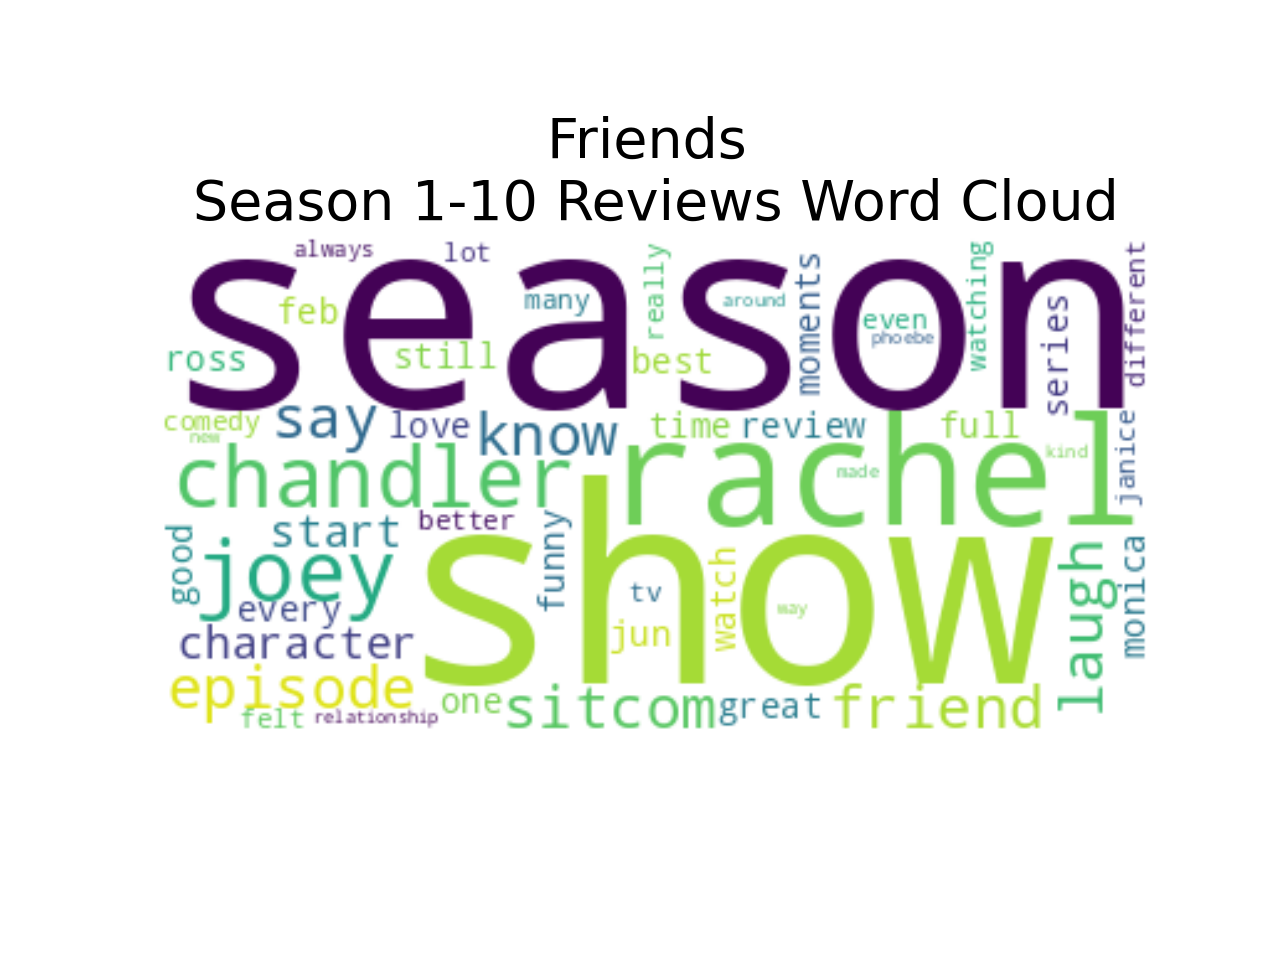

In [ ]:
stop_words = set(stopwords.words('english'))
all_text = ' '.join(all_reviews['review']).lower()
cleaned_text = ''.join(char for char in all_text if char not in string.punctuation)
words = word_tokenize(cleaned_text)
filtered_words = [word for word in words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)
top_words = dict(word_counts.most_common(200))
top_words_clean = ','.join([word for word in top_words.keys()])
print(top_words_clean)
wordcloud = WordCloud(background_color='white', max_words=50).generate(top_words_clean)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"{show} \nSeason 1-{num_seasons} Reviews Word Cloud", fontsize=20)


### Top Words by Season


In [ ]:
other_dict = []

for i in count:
  s1 = all_reviews[all_reviews['season'].str.contains(str(i))]
  all_text = ' '.join(s1['review']).lower()
  cleaned_text = ''.join(char for char in all_text if char not in string.punctuation)
  words = word_tokenize(cleaned_text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  word_counts = Counter(filtered_words)
  all_words = dict(word_counts)
  sorted_dict = dict(sorted(all_words.items(), key=lambda item: item[1], reverse=True))
  other_dict.append(sorted_dict)

num_words = pd.DataFrame()
tw = dict(list(top_words.items())[:20])
c = 0
for i in other_dict:
  # print(word1)
  c += 1
  # print("NEW DICT ", count )
  counts_arr = []
  for word1, count1 in tw.items():
    # print(word1)
    added = False
    for word2, count2 in i.items():
      if word1 == word2:
        added = True
        counts_arr.append(count2)
    if(added == False):
      counts_arr.append(0)
  # print(counts_arr)
  num_words[f'Season {c}'] = counts_arr

num_words
# print([word for word in top_words if word.lower() not in stop_words])

,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8,Season 9,Season 10
0,14,26,22,17,26,19,14,21,16,6
1,58,14,10,13,12,11,8,16,11,20
2,74,5,6,5,10,9,6,10,9,32
3,72,5,6,5,10,9,6,10,8,32
4,34,9,14,7,12,15,7,12,10,17
5,18,9,14,9,14,5,13,11,5,7
6,10,17,13,7,10,11,5,4,9,9
7,5,14,11,6,5,7,2,14,12,4
8,1,9,6,6,13,9,13,6,9,1
9,25,3,4,4,9,7,5,7,6,24


Text(0, 0.5, 'Words Count')

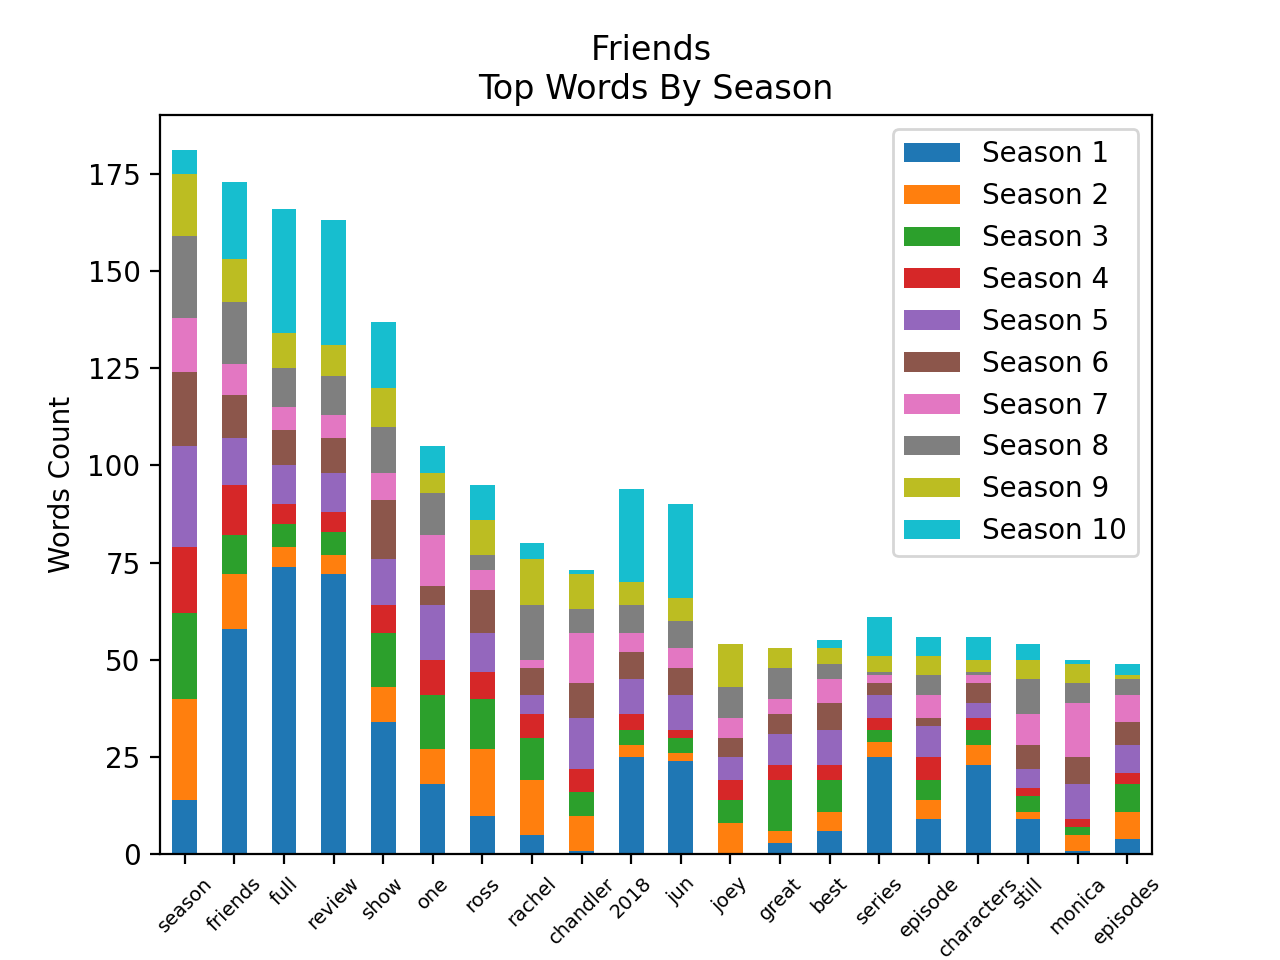

In [ ]:
num_words['words'] = list(top_words.keys())[:20]
num_words.set_index('words')

ax = num_words.plot(kind="bar", stacked = True)
ax.set_xticklabels(num_words['words'], rotation = 45, size = 7)
plt.title(f"{show} \nTop Words By Season")
plt.xlabel("Word")
plt.ylabel("Words Count")


# Sentiment Analysis

## Sentiment for each season

In [ ]:
all_reviews.head(62)
sorted_df = sorted_df = all_reviews.sort_values(by='word_count', ascending=False)
sorted_df.head()

,date,rating,review,season,type,word_count,word_count_gt_512
29,"Jun 15, 2020",4.0,Much better season than Season 1. It had my fa...,02,user,510,False
48,"Jun 15, 2020",5.0,"One of my favourite season, 'The one where no ...",03,user,509,False
33,"Dec 9, 2019",5.0,This is definitely one of my favorite seasons ...,02,user,466,False
126,"Jun 15, 2020",4.5,A bit better than last season with the best w...,07,user,279,False
97,"Jun 12, 2019",0.5,"Season 5, episode titled ‘The one with all the...",05,user,277,False


In [ ]:
def count_words(review):
    tokens = word_tokenize(review)  # Tokenize the review into words
    return len(tokens)  # Return the count of words

# Apply the count_words function to each review and create a new column with the word count
all_reviews['word_count'] = all_reviews['review'].apply(count_words)
all_reviews['word_count_gt_400'] = all_reviews['word_count'] > 400

In [ ]:
summarize = pipeline("summarization")

In [ ]:
for index, row in all_reviews[all_reviews['word_count_gt_400'] == True].iterrows():
    shortened = summarize(row['review'], min_length=100, max_length=350)
    print(shortened[0]['summary_text'])
    all_reviews.at[index, 'review'] = shortened[0]['summary_text']


 This is definitely one of my favorite seasons of Friends! The Premise according to friends.fandom.com is "This season features more serialized storylines" Tom Selleck begins a recurring guest role as Dr. Richard Burke, a friend of Monica and Ross' parents who is recently divorced and with grown children, is 21 years older than Monica . Despite their age difference, they date for the second half of the season, they end the relationship when they realize that he does not want any more children and she does .
 'F.R.I.E.N.D.S' is one of the best time passing shows I have ever seen . Fans of the show say it felt like having Friends in Real life . Reviewer says he was addicted to 236 episodes in 65 days . Loved every stereotypical roles they had, Joey getting dumber as seasons progress was a wise decision as Dumb Joey had more comedic moments that will stick with me forever . Loves the use of laugh-track but I see no problem with that, it is a scientific fact that if others laugh around you

In [ ]:
all_reviews.drop(columns=['word_count'], inplace=True)
all_reviews.drop(columns=['word_count_gt_512'], inplace=True)
# all_reviews['word_count'] = all_reviews['review'].apply(count_words)
# all_reviews['word_count_gt_400'] = all_reviews['word_count'] > 400

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment = sentiment_pipeline(list(all_reviews['review']))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent = [item['label'] for item in sentiment]
scores = [item['score'] for item in sentiment]

all_reviews['sentiment'] = sent
all_reviews['sentiment_score'] = scores
all_reviews

,date,rating,review,season,type,word_count,word_count_gt_400,sentiment,sentiment_score
0,"Apr 25, 2024",5.0,Friends is a good show and if you hate or disl...,01,user,31,False,NEGATIVE,0.820605
15,"Dec 4, 2017",5.0,What draws me back to Friends again and again ...,01,top_critic,39,False,POSITIVE,0.999278
14,"Apr 17, 2018",0.0,"NBC's new sitcom ""Friends"" comes across like a...",01,top_critic,33,False,NEGATIVE,0.999203
13,"Feb 24, 2021",5.0,This show has some problems. But if David and ...,01,top_critic,35,False,POSITIVE,0.996817
12,"Feb 24, 2021",0.0,The characters spend a lot of time watching ol...,01,top_critic,44,False,NEGATIVE,0.943707
...,...,...,...,...,...,...,...,...,...
180,"Feb 6, 2023",5.0,Fantastic season. Love Paul Rudd.\nHate that i...,10,user,22,False,POSITIVE,0.886554
179,"Jun 4, 2023",4.0,The perfect comedy show.,10,user,5,False,POSITIVE,0.999876
178,"Jun 10, 2023",5.0,"LOL, the funniest final 17 episodes ever!!!!!!...",10,user,24,False,POSITIVE,0.999819
190,"Jul 28, 2021",5.0,Nostalgia at its finest,10,user,4,False,POSITIVE,0.999820


Creating a Sentiment Scale:

(weighted sentiments)

If sentiment Positive, value = 1*sentiment_score

If sentiment Negative, value = -1*sentiment_score

(ratings normalized)

If Rating = 5, value = 1

If Rating = 4, value = .5

If Rating = 3, value = 0

If Rating = 2, value = -.5

If Rating = 1, value = -1

The final value is the average of these values.

In [ ]:
# Define a function to calculate the final value for each row
def calculate_final_sent(row):
    sentiment_score = row['sentiment_score']

    p5 = str(row['rating']).endswith('.5')
    rating = round(row['rating'])
    sentiment = row['sentiment']

    # Calculate weighted sentiment score
    if sentiment == 'POSITIVE':
        weighted_sentiment = sentiment_score
    elif sentiment == 'NEGATIVE':
        weighted_sentiment = -1 * sentiment_score
    else:
        weighted_sentiment = 0  # Neutral sentiment

    # Normalize rating
    if rating == 5:
        normalized_rating = 1
    elif rating == 4:
        normalized_rating = 0.5
    elif rating == 3:
        normalized_rating = 0
    elif rating == 2:
        normalized_rating = -0.5
    elif rating == 1:
        normalized_rating = -1
    else:
        normalized_rating = 0

    if p5:
      normalized_rating + .25

    # Calculate the final value
    final_value = (weighted_sentiment + normalized_rating) / 2

    return final_value

# Apply the function to each row in the DataFrame
all_reviews['review_sentiment'] = all_reviews.apply(calculate_final_sent, axis=1)

# Calculate the average final value
average_final_value = all_reviews['review_sentiment'].mean()

# Print the average final value
print("Average final value:", average_final_value)


Average final value: 0.5850459771496909


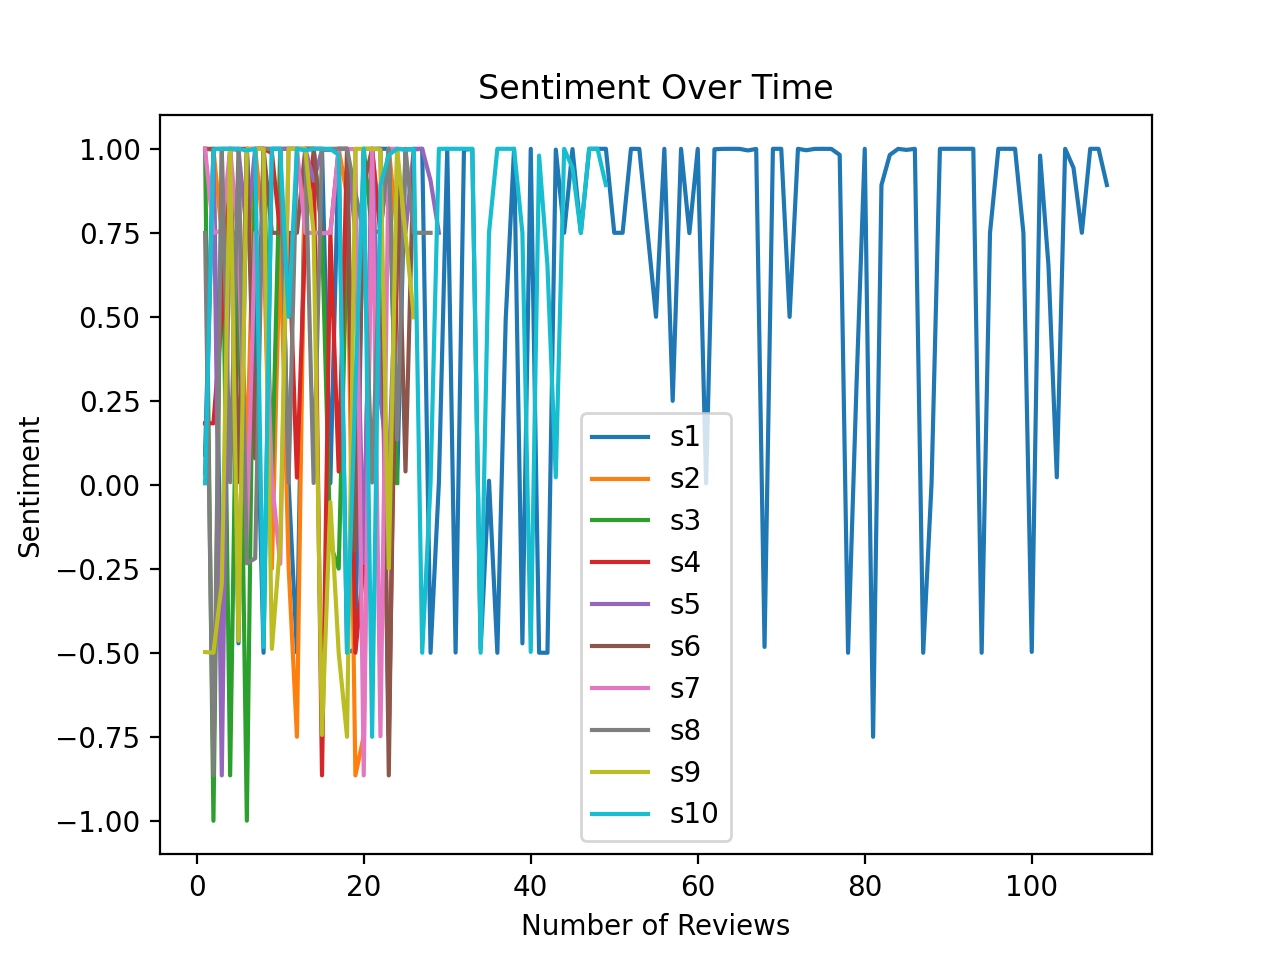

In [ ]:
for i in count:
  dset = all_reviews[all_reviews['season'].str.contains(str(i))]
  x_vals = list(range(1, len(dset)+1))
  plt.plot(x_vals, dset['review_sentiment'])


plt.xlabel('Number of Reviews')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
labels=[f"s{i}" for i in count]
plt.legend(labels)

Text(0.5, 1.0, 'Average Sentiment Through Seasons')

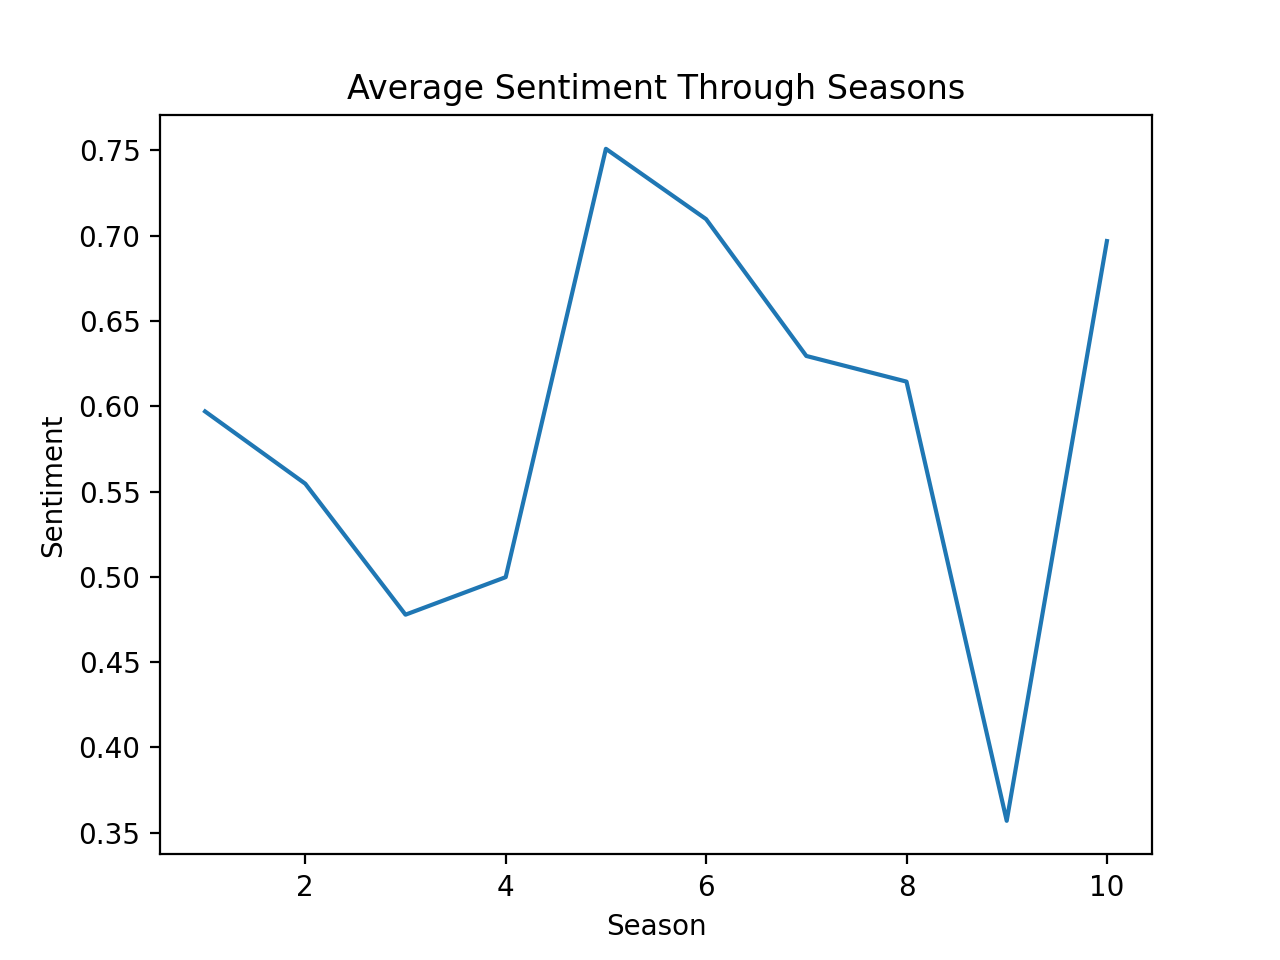

In [ ]:
dset = []
for i in count:
  dset.append(all_reviews[all_reviews['season'].str.contains(str(i))]['review_sentiment'].mean())

plt.plot(count, dset)


plt.xlabel('Season')
plt.ylabel('Sentiment')
plt.title('Average Sentiment Through Seasons')

## Most Positive/Negative Words Used

In [ ]:
all_words = dict(word_counts)
all_words_sent = sentiment_pipeline(list(all_words.keys()))

In [ ]:
word_sent = pd.DataFrame(all_words_sent)
word_sent["word"] = list(all_words.keys())
word_sent["word_count"] = list(all_words.values())
word_sent

,label,score,word,word_count
0,POSITIVE,0.999832,friends,20
1,NEGATIVE,0.755413,isnt,2
2,NEGATIVE,0.999619,sitcom,5
3,NEGATIVE,0.994334,soapcom,2
4,NEGATIVE,0.953427,soap,3
...,...,...,...,...
424,NEGATIVE,0.999690,hate,1
425,NEGATIVE,0.989737,dont,1
426,POSITIVE,0.999852,perfect,1
427,POSITIVE,0.983015,17,1


In [ ]:
word_sent = word_sent.sort_values(by='score', ascending=False)
neutral_df = word_sent[word_sent['label'] == 'NEUTRAL'].copy()
positive_df = word_sent[word_sent['label'] == 'POSITIVE'].copy()
negative_df = word_sent[word_sent['label'] == 'NEGATIVE'].copy()
positive_df

,label,score,word,word_count
270,POSITIVE,0.999881,loved,1
269,POSITIVE,0.999879,hilarious,2
70,POSITIVE,0.999878,funniest,3
245,POSITIVE,0.999876,fun,2
252,POSITIVE,0.999876,amazing,3
...,...,...,...,...
181,POSITIVE,0.694784,nbc,2
238,POSITIVE,0.685333,ends,1
373,POSITIVE,0.672265,though,1
21,POSITIVE,0.638648,sentimentality,1


In [ ]:
top_10_positive_words = positive_df.head(10)
top_10_positive_words

,label,score,word,word_count
270,POSITIVE,0.999881,loved,1
269,POSITIVE,0.999879,hilarious,2
70,POSITIVE,0.999878,funniest,3
245,POSITIVE,0.999876,fun,2
252,POSITIVE,0.999876,amazing,3
29,POSITIVE,0.999875,laughs,3
339,POSITIVE,0.999875,memorable,1
421,POSITIVE,0.999874,fantastic,1
101,POSITIVE,0.999874,love,4
317,POSITIVE,0.999871,real,2


In [ ]:
top_10_negative_words = negative_df.head(10)
top_10_negative_words

,label,score,word,word_count
133,NEGATIVE,0.999808,formulaic,2
358,NEGATIVE,0.999797,bored,1
360,NEGATIVE,0.999796,annoying,1
296,NEGATIVE,0.999784,sadly,1
361,NEGATIVE,0.999784,suffer,1
249,NEGATIVE,0.999782,bad,1
132,NEGATIVE,0.999782,artificial,2
274,NEGATIVE,0.999778,blandly,1
413,NEGATIVE,0.999773,negative,1
191,NEGATIVE,0.999765,bland,3


In [ ]:
word_sent = word_sent.sort_values(by='word_count', ascending=False)
neutral_df = word_sent[word_sent['label'] == 'NEUTRAL'].copy()
positive_df = word_sent[word_sent['label'] == 'POSITIVE'].copy()
negative_df = word_sent[word_sent['label'] == 'NEGATIVE'].copy()

Text(0, 0.5, 'Words Count')

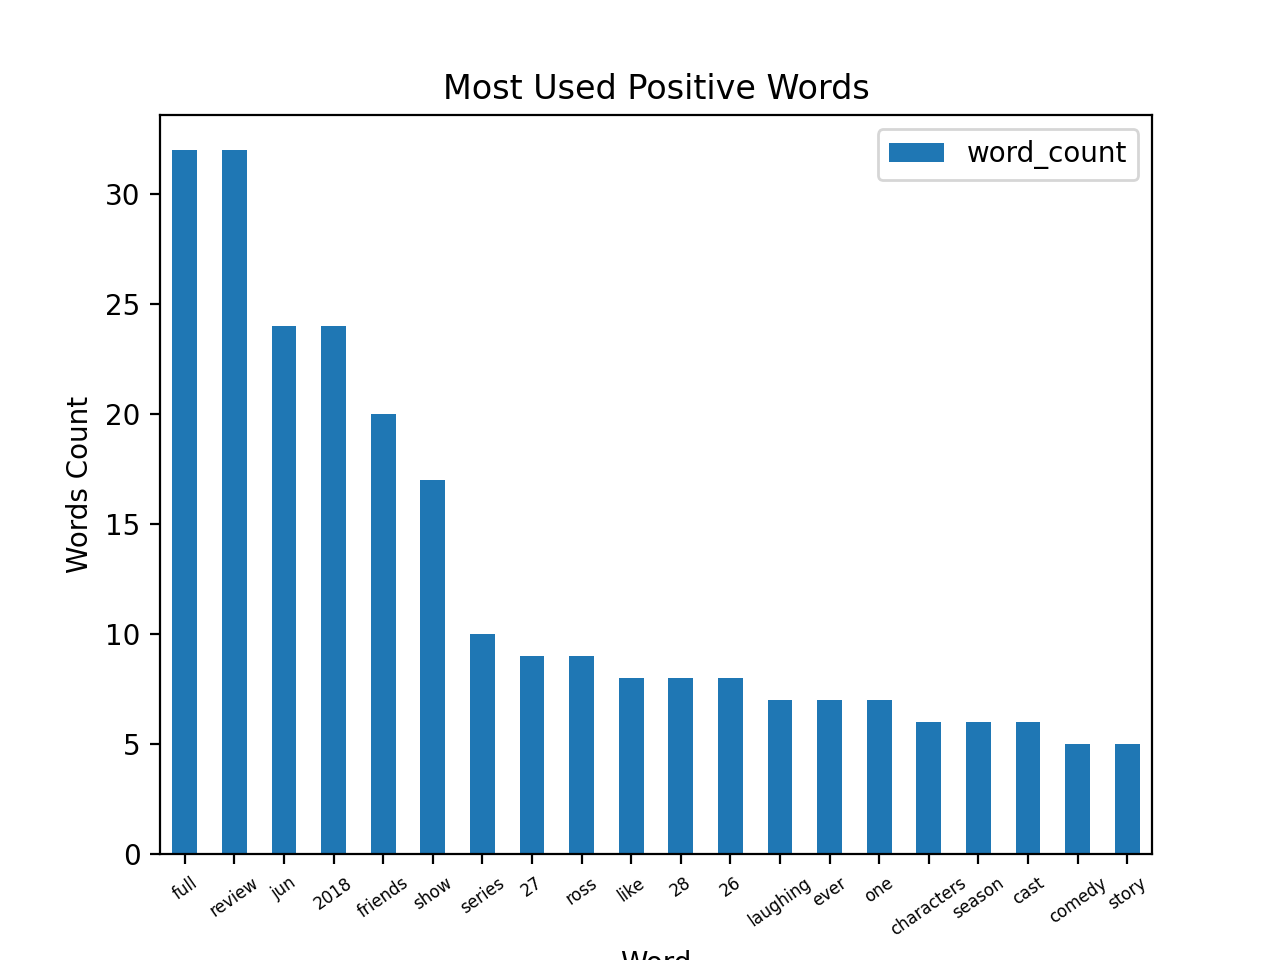

In [ ]:
temp = pd.DataFrame(positive_df['word'])
temp["word_count"] = positive_df['word_count']
temp = temp.head(20)
ax = temp.plot(kind = 'bar')
ax.set_xticklabels(positive_df['word'].head(20), rotation = 35, size = 6)
plt.title("Most Used Positive Words")
plt.xlabel("Word")
plt.ylabel("Words Count")

Text(0, 0.5, 'Words Count')

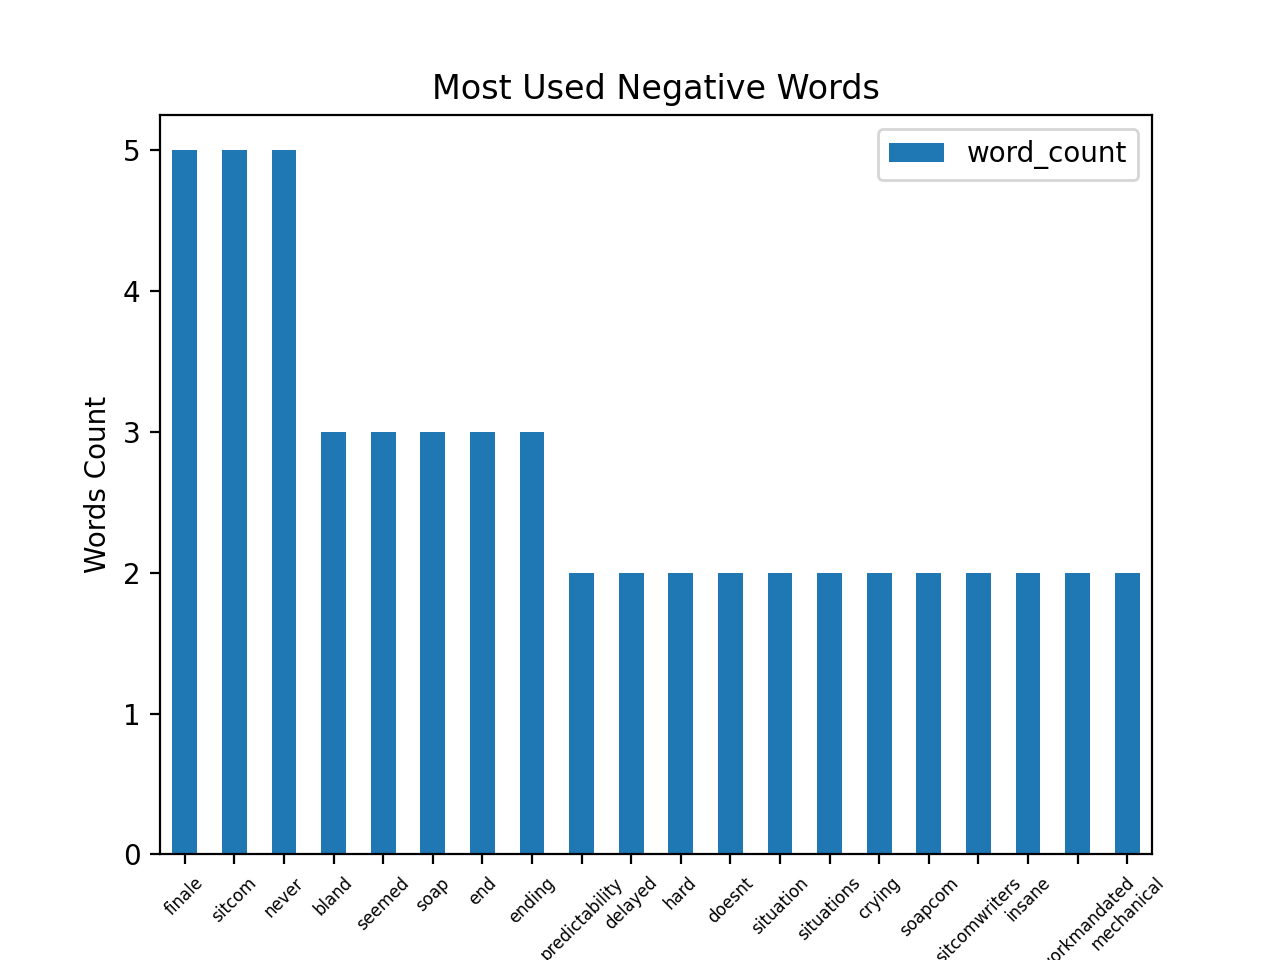

In [ ]:
temp = pd.DataFrame(negative_df['word'])
temp["word_count"] = negative_df['word_count']
temp = temp.head(20)
ax =temp.plot(kind = 'bar')
ax.set_xticklabels(negative_df['word'].head(20), rotation = 45, size = 6)
plt.title("Most Used Negative Words")
plt.xlabel("Word")
plt.ylabel("Words Count")